In [1]:
a = [-0.0858, 0.4438, -0.1316, -0.1273, 0.0578, -0.2885, -0.0812, -0.0357, -0.0630, 0.0306, -0.0403, 0.0573]

In [3]:
abs_a = [abs(i) for i in a ]

In [8]:
abs_a.sort()

None


In [9]:
abs_a

[0.0306,
 0.0357,
 0.0403,
 0.0573,
 0.0578,
 0.063,
 0.0812,
 0.0858,
 0.1273,
 0.1316,
 0.2885,
 0.4438]

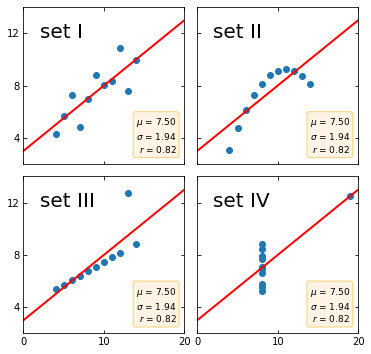

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'set I': (x, y1),
    'set II': (x, y2),
    'set III': (x, y3),
    'set IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [14]:
!pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.shutil-get-terminal-

toml @ file:///tmp/build/80754af9/toml_1616166611790/work
toolz @ file:///home/linux1/recipes/ci/toolz_1610987900194/work
tornado @ file:///C:/ci/tornado_1606942392901/work
tqdm @ file:///tmp/build/80754af9/tqdm_1615925068909/work
traitlets @ file:///home/ktietz/src/ci/traitlets_1611929699868/work
typed-ast @ file:///C:/ci/typed-ast_1610466535590/work
typing-extensions @ file:///home/ktietz/src/ci_mi/typing_extensions_1612808209620/work
ujson @ file:///C:/ci/ujson_1611241570789/work
unicodecsv==0.14.1
urllib3 @ file:///tmp/build/80754af9/urllib3_1615837158687/work
watchdog @ file:///C:/ci/watchdog_1612471251191/work
wcwidth @ file:///tmp/build/80754af9/wcwidth_1593447189090/work
webencodings==0.5.1
Werkzeug @ file:///home/ktietz/src/ci/werkzeug_1611932622770/work
widgetsnbextension==3.5.1
win-inet-pton @ file:///C:/ci/win_inet_pton_1605306167264/work
win-unicode-console==0.5
wincertstore==0.2
wrapt==1.12.1
xlrd @ file:///tmp/build/80754af9/xlrd_1608072521494/work
XlsxWriter @ file:///t